In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/gajulasupreethi/Desktop/Datasets/globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')

/var/folders/4s/ym6823nj0vv67q77zf3g5llm0000gn/T/ipykernel_3756/1714308718.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/gajulasupreethi/Desktop/Datasets/globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')


In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
#data preprocessing
#clean the data
#checking for the null values
df.isnull()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181687,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181688,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True
181689,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True


In [5]:
#there are many null values in the dataset
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [6]:
#in the approxdate and related columns there are so many null values
#better to drop the column
#first we shall see the columns
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
#now we shall see the shape of the data
df.shape

(181691, 135)

In [8]:
#we shall only consider the required columns from our dataset

df = df[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city', 'location',
         'attacktype1_txt','targtype1_txt', 'natlty1_txt', 'gname', 'weaptype1_txt', 
         'nkill', 'nwound','propextent_txt']]


In [9]:
df.isnull().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
region_txt              0
city                  435
location           126196
attacktype1_txt         0
targtype1_txt           0
natlty1_txt          1559
gname                   0
weaptype1_txt           0
nkill               10313
nwound              16311
propextent_txt     117626
dtype: int64

In [10]:
df['city'] = df['city'].fillna(df['city'].mode)
df['location'] = df['location'].fillna(df['location'].mode)
df['natlty1_txt'] = df['natlty1_txt'].fillna(df['natlty1_txt'].mode)
df['nkill'] = df['nkill'].fillna(0)
df['nwound'] = df['nwound'].fillna(0)
df['propextent_txt'] = df['propextent_txt'].fillna(df['propextent_txt'].mode)

In [11]:
df.isnull().sum()

iyear              0
imonth             0
iday               0
country_txt        0
region_txt         0
city               0
location           0
attacktype1_txt    0
targtype1_txt      0
natlty1_txt        0
gname              0
weaptype1_txt      0
nkill              0
nwound             0
propextent_txt     0
dtype: int64

In [12]:
df.shape

(181691, 15)

In [13]:
df.dtypes

iyear                int64
imonth               int64
iday                 int64
country_txt         object
region_txt          object
city                object
location            object
attacktype1_txt     object
targtype1_txt       object
natlty1_txt         object
gname               object
weaptype1_txt       object
nkill              float64
nwound             float64
propextent_txt      object
dtype: object

In [14]:
df['suffered'] = df['nkill']+df['nwound']
df['suffered']

0         1.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
181686    3.0
181687    9.0
181688    0.0
181689    0.0
181690    0.0
Name: suffered, Length: 181691, dtype: float64

In [15]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,city,location,attacktype1_txt,targtype1_txt,natlty1_txt,gname,weaptype1_txt,nkill,nwound,propextent_txt,suffered
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,<bound method Series.mode of 0 ...,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,1.0,0.0,<bound method Series.mode of 0 NaN...,1.0
1,1970,0,0,Mexico,North America,Mexico city,<bound method Series.mode of 0 ...,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,Unknown,0.0,0.0,<bound method Series.mode of 0 NaN...,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,<bound method Series.mode of 0 ...,Assassination,Journalists & Media,United States,Unknown,Unknown,1.0,0.0,<bound method Series.mode of 0 NaN...,1.0
3,1970,1,0,Greece,Western Europe,Athens,<bound method Series.mode of 0 ...,Bombing/Explosion,Government (Diplomatic),United States,Unknown,Explosives,0.0,0.0,<bound method Series.mode of 0 NaN...,0.0
4,1970,1,0,Japan,East Asia,Fukouka,<bound method Series.mode of 0 ...,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,Incendiary,0.0,0.0,<bound method Series.mode of 0 NaN...,0.0


In [16]:
df.columns

Index(['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city',
       'location', 'attacktype1_txt', 'targtype1_txt', 'natlty1_txt', 'gname',
       'weaptype1_txt', 'nkill', 'nwound', 'propextent_txt', 'suffered'],
      dtype='object')

In [17]:
df.shape

(181691, 16)

Text(0.5, 1.0, 'country distribution')

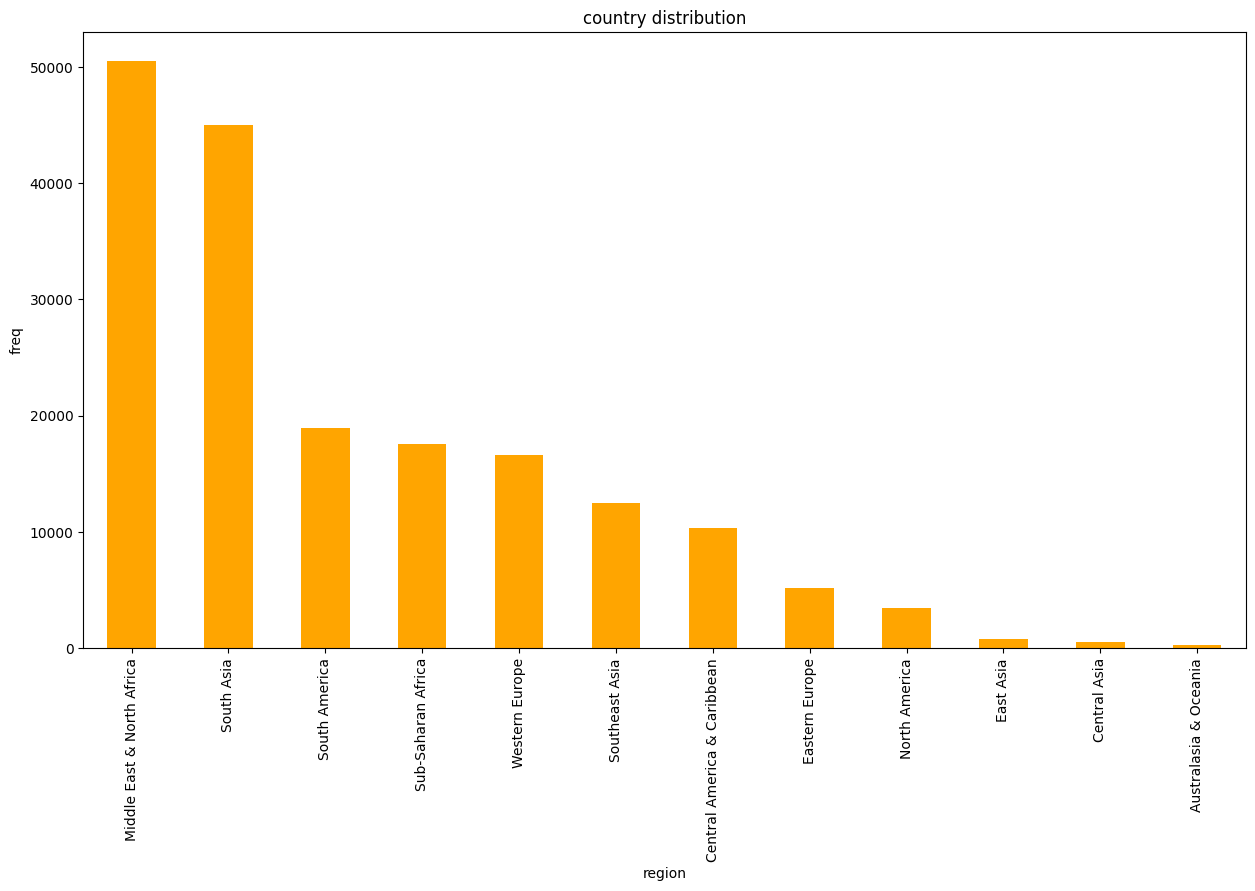

In [18]:
#data visualization
#we will see the region distribution
region = df['region_txt'].value_counts()
region.plot(kind = 'bar',figsize = (15,8),color = 'orange')
plt.xlabel('region')
plt.ylabel('freq')
plt.title('country distribution')

Text(0.5, 1.0, 'attack distribution')

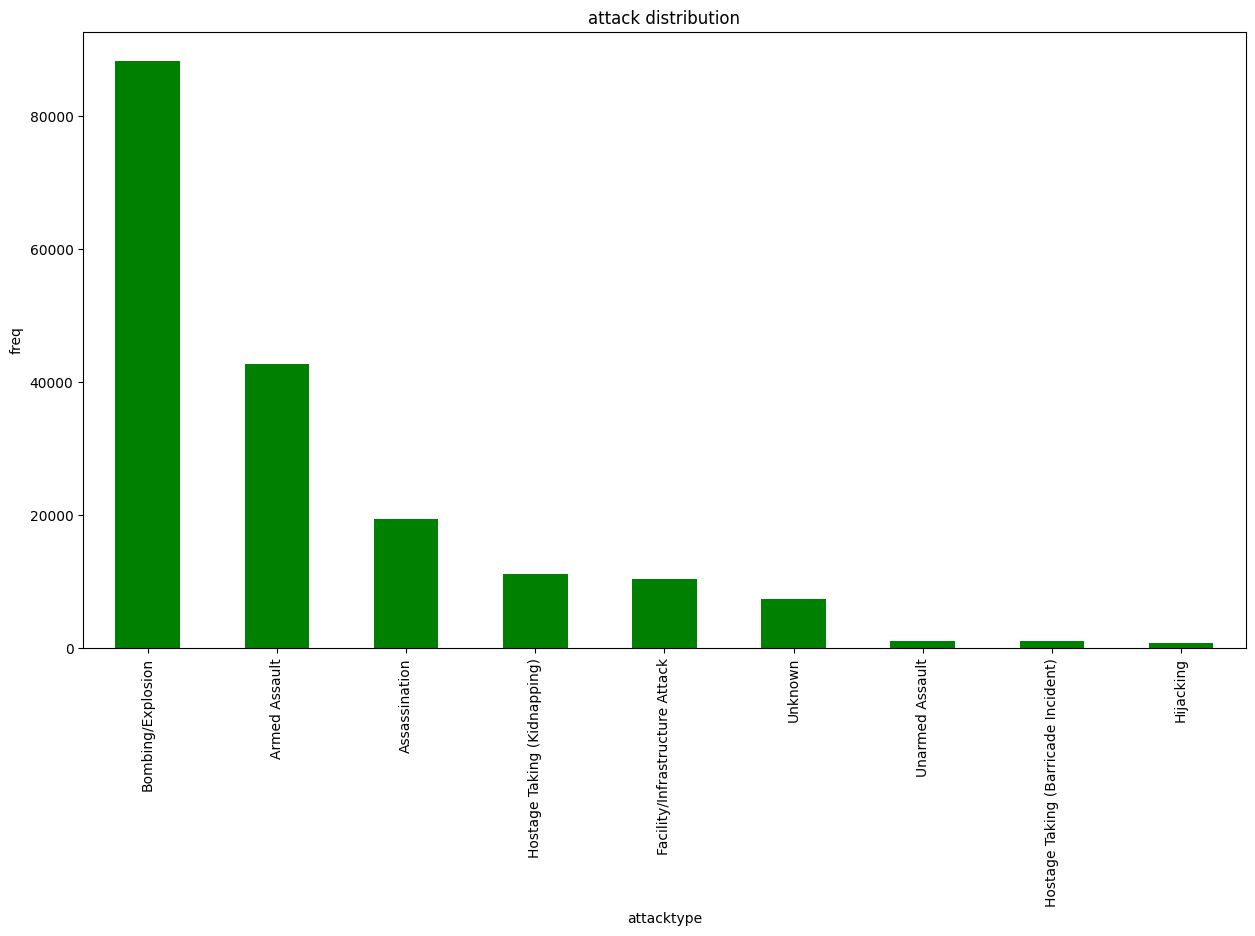

In [19]:
attacks = df['attacktype1_txt'].value_counts()
attacks.plot(kind = 'bar',figsize = (15,8),color = 'green')
plt.xlabel('attacktype')
plt.ylabel('freq')
plt.title('attack distribution')
#Bombing and explosion - highest
#unarmed assault,hostage taking and hijacking are the least

Text(0.5, 1.0, 'types of targets')

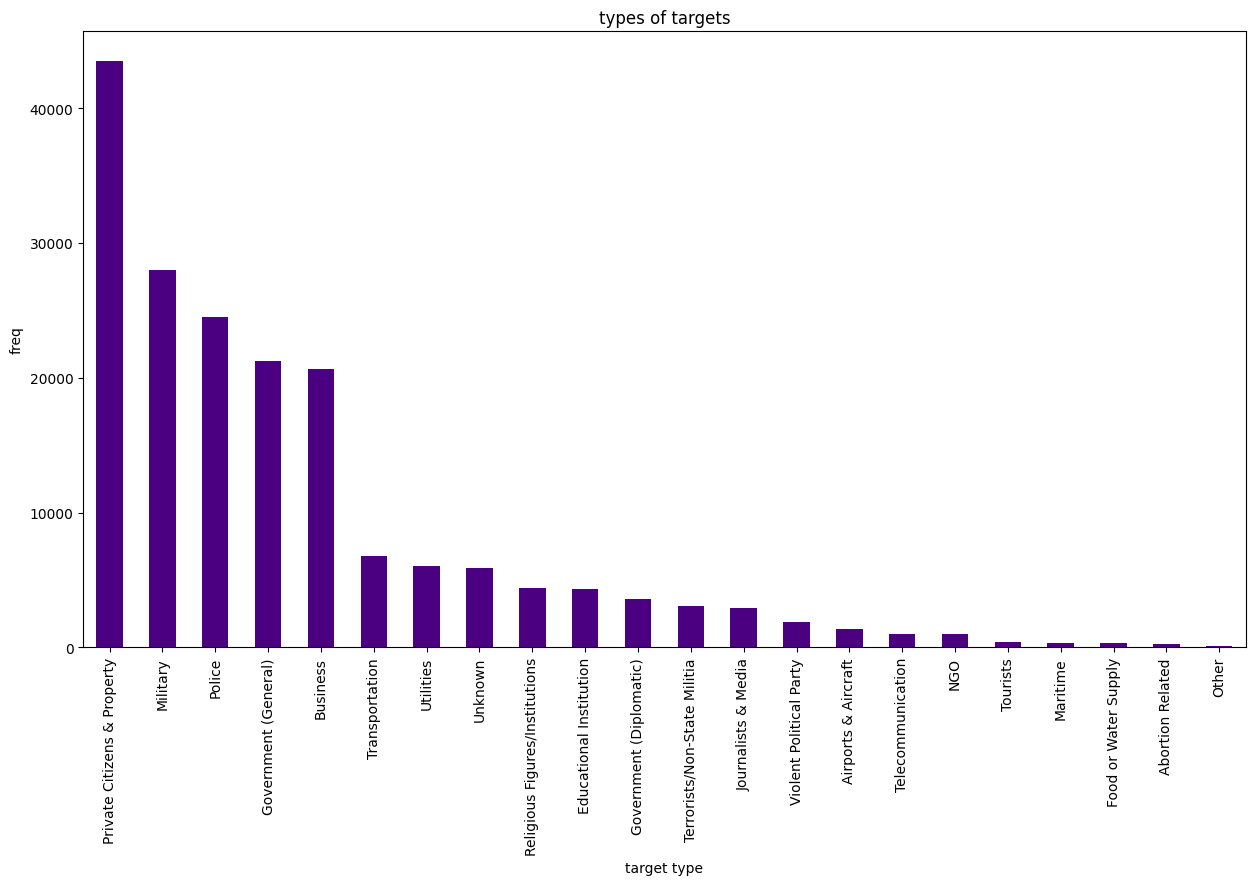

In [20]:
targets = df['targtype1_txt'].value_counts()
targets.plot(kind = 'bar',figsize = (15,8),color = 'indigo')
plt.xlabel('target type')
plt.ylabel('freq')
plt.title('types of targets')
#private citizens and property are of highest number
#food or water supply ,abortion related are very low

Text(0.5, 1.0, 'different nations')

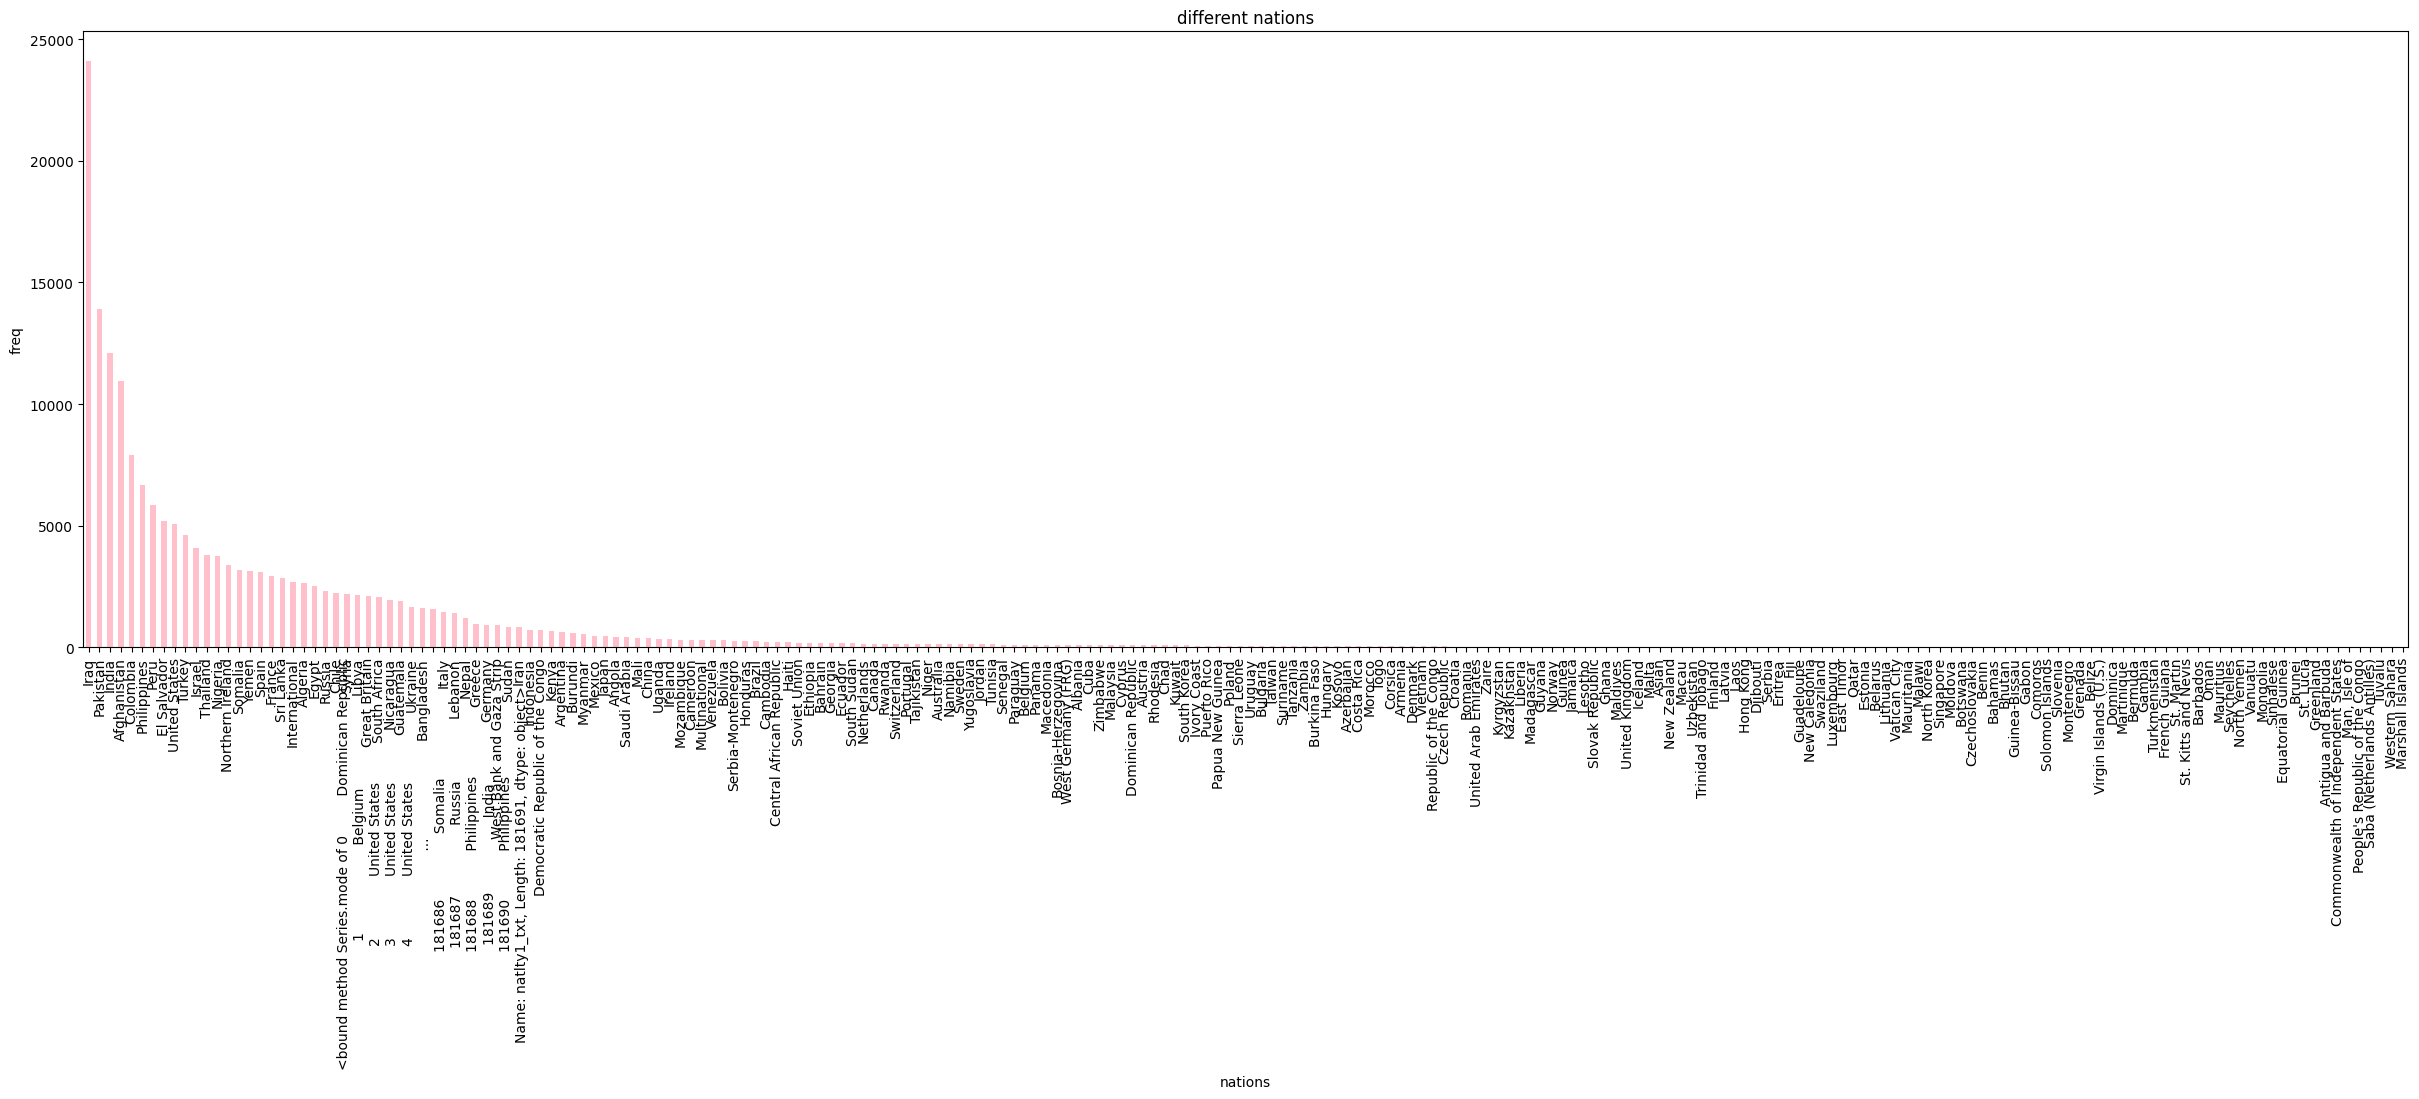

In [21]:
nations = df['natlty1_txt'].value_counts()
nations.plot(kind = 'bar',figsize = (30,8),color = 'pink')
plt.xlabel('nations')
plt.ylabel('freq')
plt.title('different nations')
#Iraq has the highest frequency
#lowest frequency is south korea

Text(0.5, 1.0, 'different weapons used')

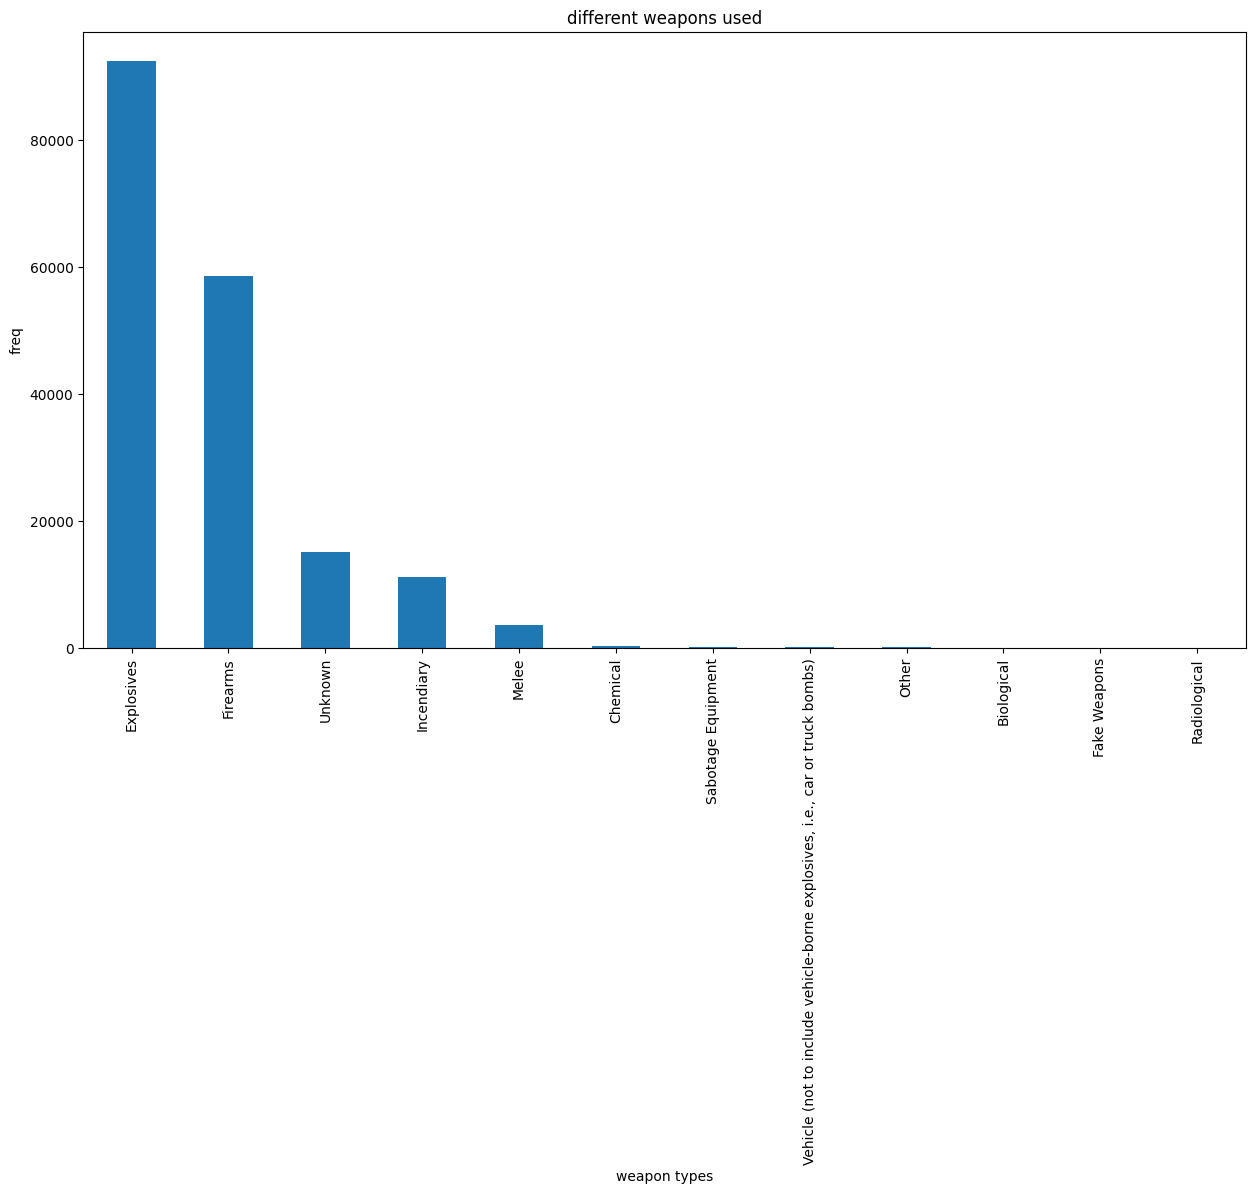

In [22]:
weapons = df['weaptype1_txt'].value_counts()
weapons.plot(kind = 'bar',figsize = (15,8))
plt.xlabel('weapon types')
plt.ylabel('freq')
plt.title('different weapons used')
#explosives very high,chemical very low

Text(0.5, 1.0, 'number of people dead')

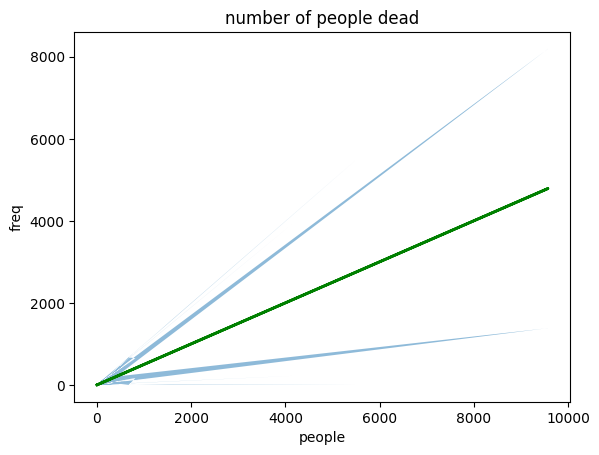

In [23]:
dead = df['nkill']
wounded = df['nwound']
suffered = df['suffered']
fig,ax = plt.subplots()
ax.fill_between(suffered,dead,wounded, alpha=.5, linewidth=0)
ax.plot(suffered, (dead + wounded)/2, linewidth=2,color = 'green')
plt.xlabel('people')
plt.ylabel('freq')
plt.title('number of people dead')

Text(0, 0.5, 'number of the counted people killed')

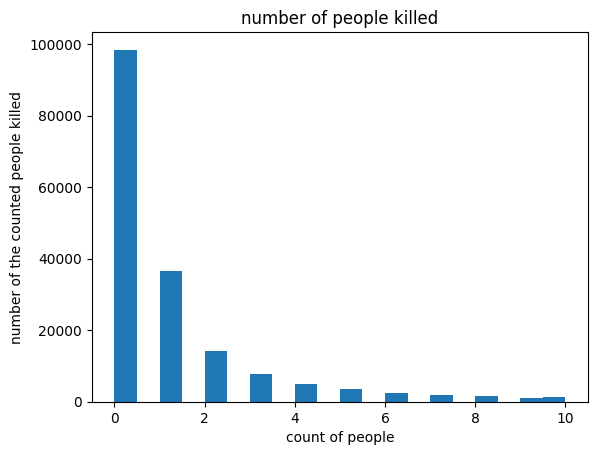

In [24]:
#we are seeing how many are killed
plt.hist(df['nkill'], bins=20, range = (0,10))
plt.title('number of people killed')
plt.xlabel('count of people')
plt.ylabel('number of the counted people killed')

Text(0, 0.5, 'number of the counted people wounded')

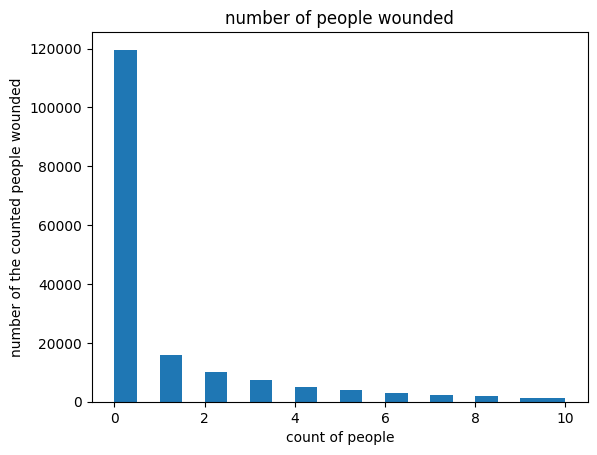

In [25]:
#similarly we see how many are wounded
plt.hist(df['nwound'], bins=20, range = (0,10))
plt.title('number of people wounded')
plt.xlabel('count of people')
plt.ylabel('number of the counted people wounded')

Text(0, 0.5, 'number of the counted people suffered')

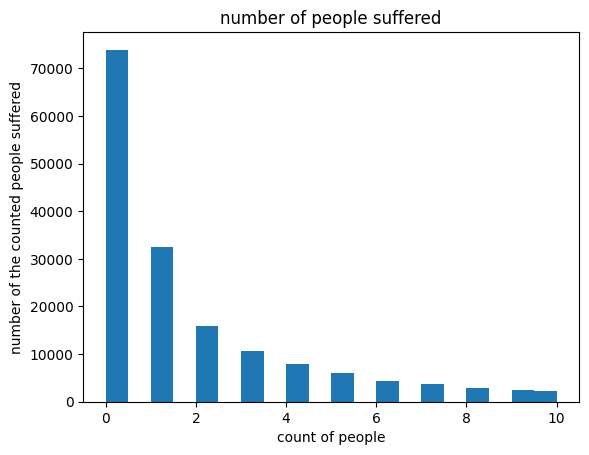

In [26]:
#similarly we will see for the suffered
plt.hist(df['suffered'], bins=20, range = (0,10))
plt.title('number of people suffered')
plt.xlabel('count of people')
plt.ylabel('number of the counted people suffered')


Text(0.5, 1.0, 'prop distribution')

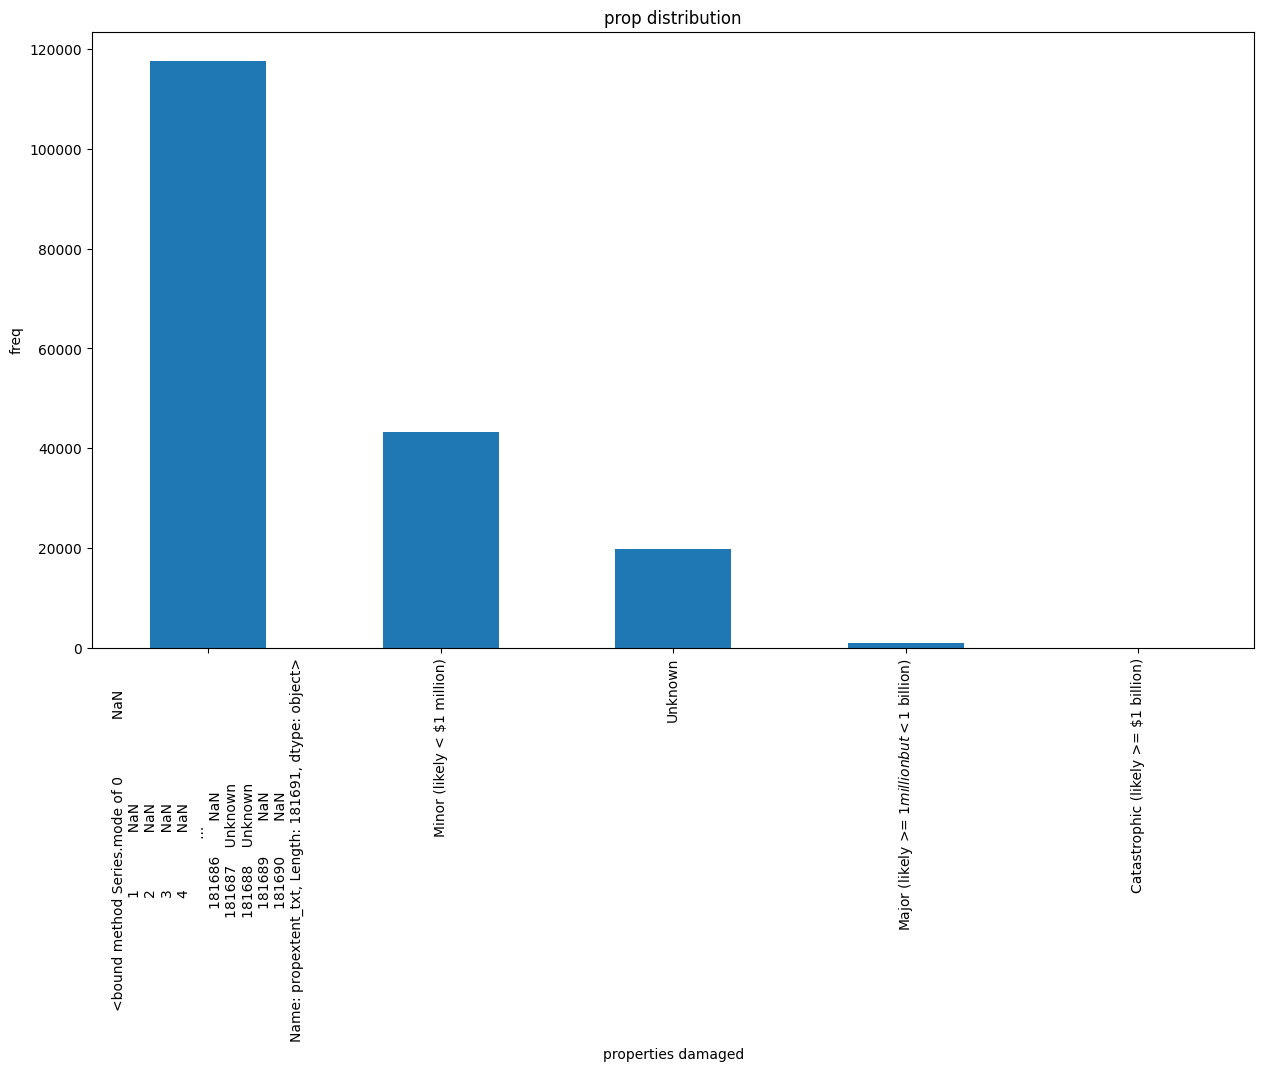

In [27]:
prop = df['propextent_txt'].value_counts()
prop.plot(kind = 'bar',figsize = (15,8))
plt.xlabel('properties damaged')

plt.ylabel('freq')
plt.title('prop distribution')

# inference so far
middle east and north africa are the most widespread areas so, for now this may be the hotspot for terrorism

australia and oceania are the least touched countries by the terrorists

terrorists prefered using the bombing and explosion type of attack the most

unarmed assault,hostage taking and hijacking are the least

as far as targets are concerned,
private citizens and property are of highest number
food or water supply ,abortion related are very low

if we see the nationalities,
Iraq has the highest frequency that means iraq was more prone to attack
lowest frequency is south korea i.e.,south korea was less prone to attack

if we see the weapons they used,
explosives very high,chemical type weapons are very low

there are mostly 0 people killed,wounded and suffered but in very rare cases, 10 or 11 people are affected

if you see the property damage,you can say that. mostly no property is damaged but minor damages  also happened in considerable amount of cases.

In [28]:
df.columns

Index(['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city',
       'location', 'attacktype1_txt', 'targtype1_txt', 'natlty1_txt', 'gname',
       'weaptype1_txt', 'nkill', 'nwound', 'propextent_txt', 'suffered'],
      dtype='object')

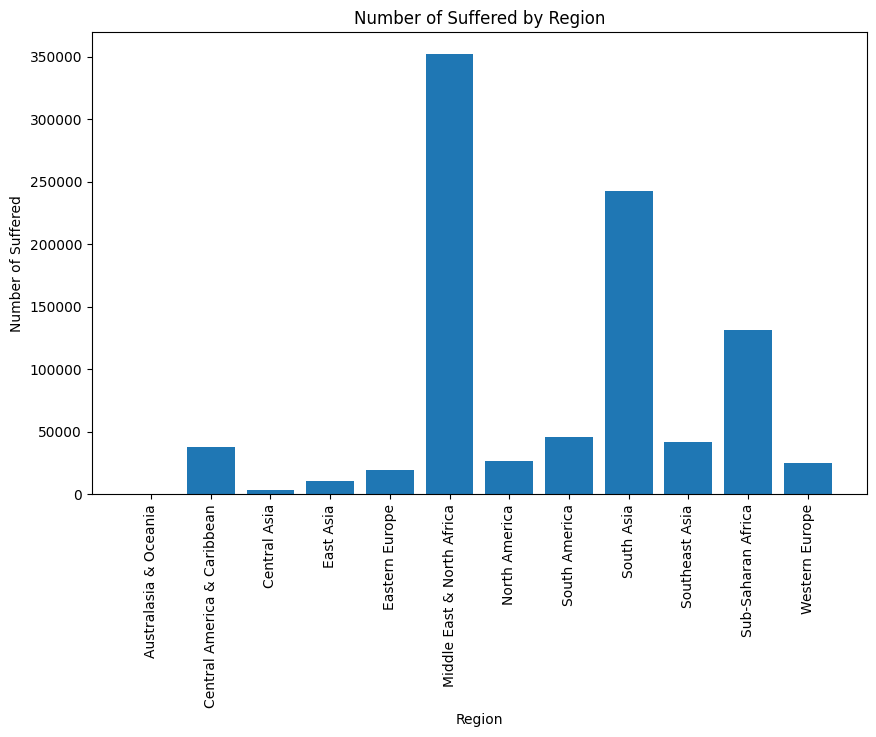

In [29]:
number_of_suffered_by_region = df.groupby('region_txt')['suffered'].sum().reset_index()
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.bar(number_of_suffered_by_region['region_txt'], number_of_suffered_by_region['suffered'])
plt.xlabel('Region')
plt.ylabel('Number of Suffered')
plt.title('Number of Suffered by Region')
plt.xticks(rotation=90) 
plt.show()


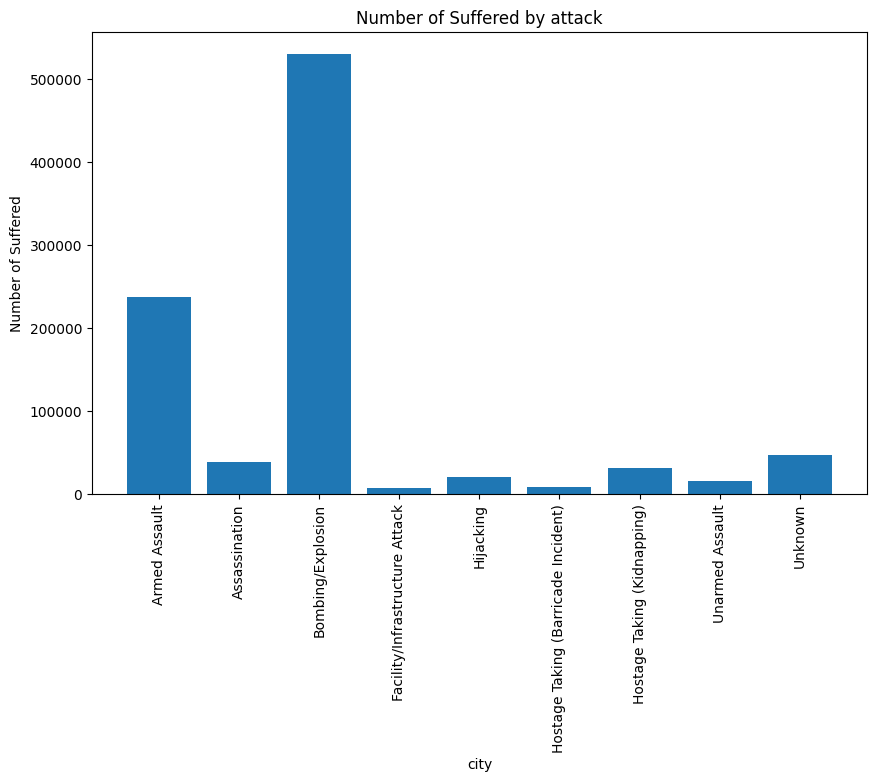

In [30]:
number_of_suffered_by_attack = df.groupby('attacktype1_txt')['suffered'].sum().reset_index()
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.bar(number_of_suffered_by_attack['attacktype1_txt'], number_of_suffered_by_attack['suffered'])
plt.xlabel('city')
plt.ylabel('Number of Suffered')
plt.title('Number of Suffered by attack')
plt.xticks(rotation=90) 
plt.show()

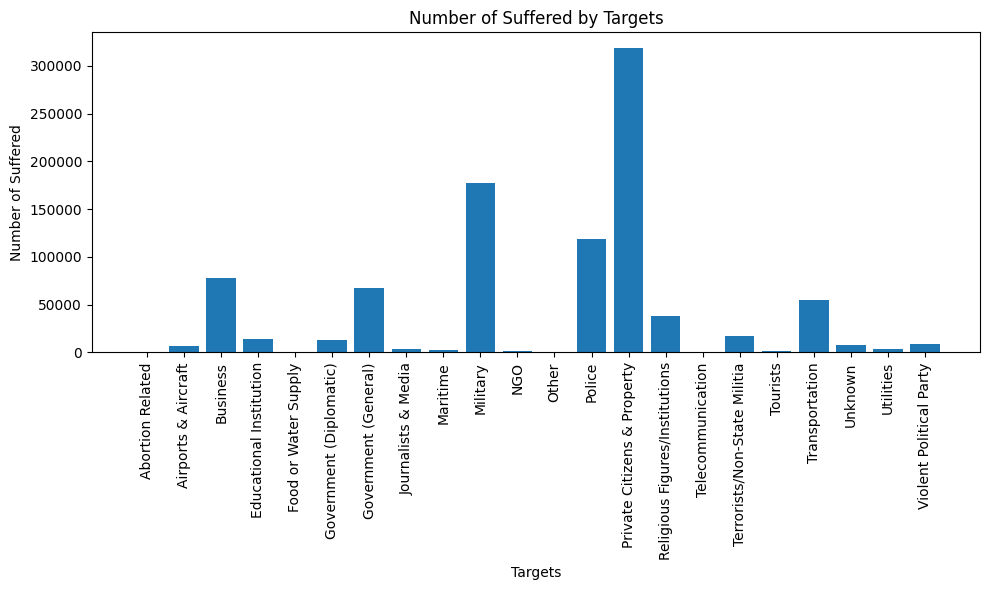

In [31]:
number_of_suffered_by_targets = df.groupby('targtype1_txt')['suffered'].sum().reset_index()

plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.bar(number_of_suffered_by_targets['targtype1_txt'], number_of_suffered_by_targets['suffered'])
plt.xlabel('Targets')
plt.ylabel('Number of Suffered')
plt.title('Number of Suffered by Targets')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


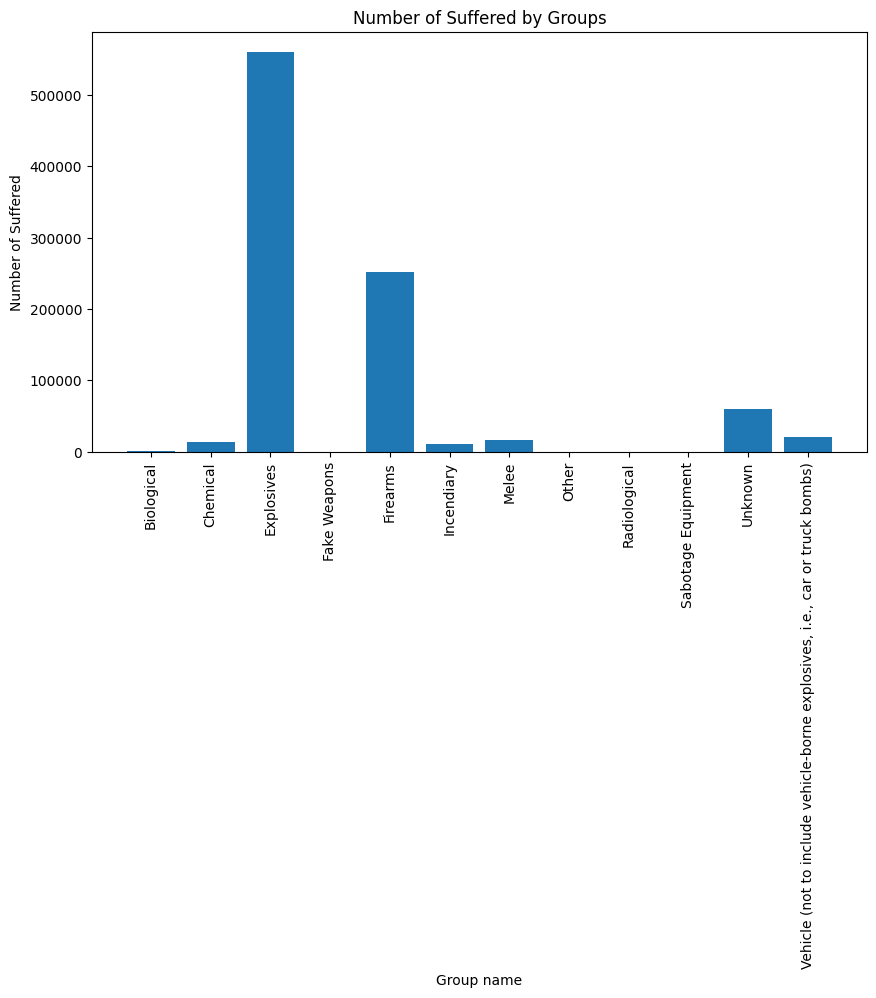

In [32]:
number_of_suffered_by_weap = df.groupby('weaptype1_txt')['suffered'].sum().reset_index()

plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.bar(number_of_suffered_by_weap['weaptype1_txt'], number_of_suffered_by_weap['suffered'])
plt.xlabel('Group name')
plt.ylabel('Number of Suffered')
plt.title('Number of Suffered by Groups')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.2, top=0.9)  # Adjust the margins
plt.show()


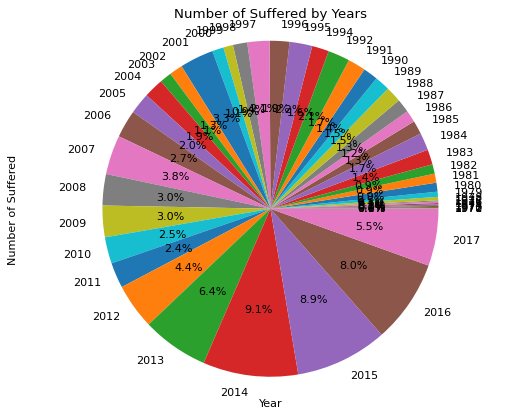

In [33]:
number_of_suffered_by_year = df.groupby('iyear')['suffered'].sum().reset_index()

plt.figure(figsize=(8, 6), dpi=80)  # Adjust the figure size and DPI
plt.pie(number_of_suffered_by_year['suffered'], labels=number_of_suffered_by_year['iyear'], autopct='%1.1f%%')
plt.xlabel('Year')
plt.ylabel('Number of Suffered')
plt.title('Number of Suffered by Years')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()


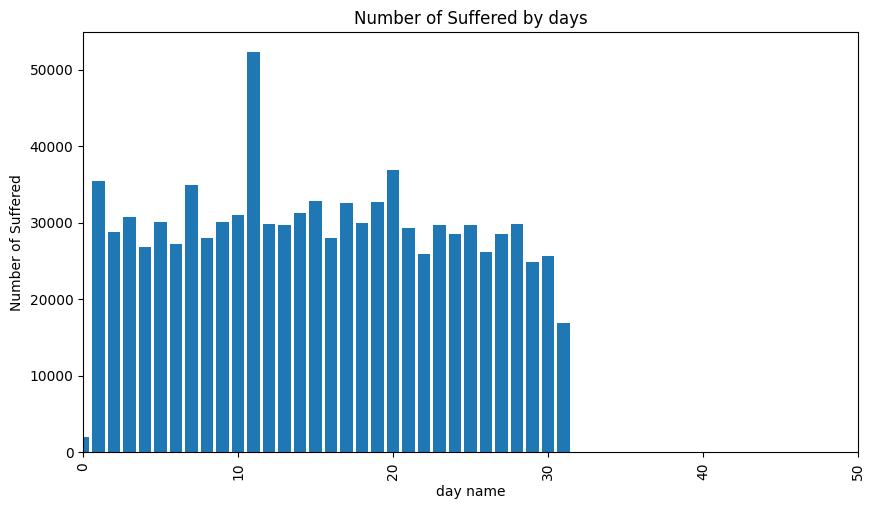

In [34]:
number_of_suffered_by_day = df.groupby('iday')['suffered'].sum().reset_index()

plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.bar(number_of_suffered_by_day['iday'], number_of_suffered_by_day['suffered'])
plt.xlabel('day name')
plt.ylabel('Number of Suffered')
plt.title('Number of Suffered by days')
plt.xlim(0,50)
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.2, top=0.9)  # Adjust the margins
plt.show()

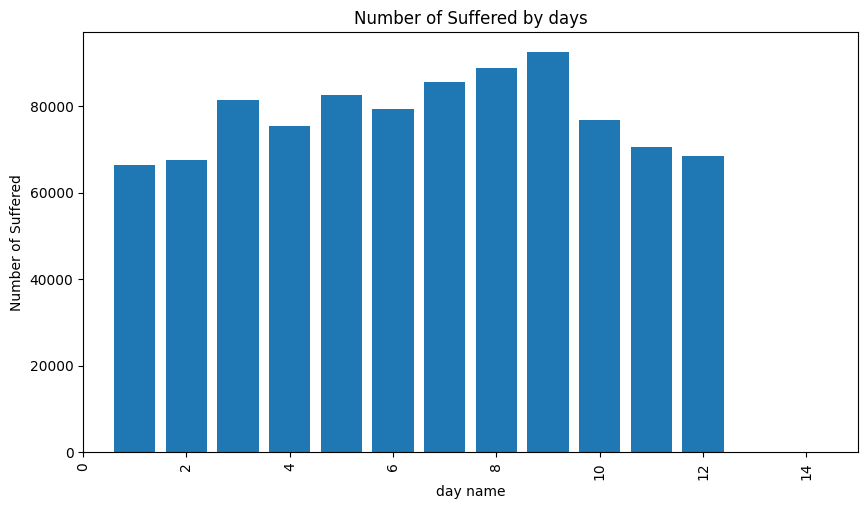

In [35]:
number_of_suffered_by_month = df.groupby('imonth')['suffered'].sum().reset_index()

plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.bar(number_of_suffered_by_month['imonth'], number_of_suffered_by_month['suffered'])
plt.xlabel('day name')
plt.ylabel('Number of Suffered')
plt.title('Number of Suffered by days')
plt.xlim(0,15)
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.2, top=0.9)  # Adjust the margins
plt.show()

# Insights
many killings took place in the year 2014 and as our data is restricted till 2017 we cannot predict the future attacks 

and many killings and casualities happened on the 11th day of any month 

and many casualities in the month of september

so increase of security in the month of september can be of use

and usage of explosives caused more damage and harm to the victims

private citizens and property is damaged highly

as the weapons that caused high damage are explosives, the attcks that caused more damage are explosions and bombings

middle east and south africa had the highest number of casualties so this is the hottest zone of terrorism

so,as far as the security is concerned, the middle east and south african security should be tight and strong.

